# **COGNIFYZ TECHNOLOGY INTERNSHIP TASKS**

## **LEVEL 1**

In [27]:
import pandas as pd

# Load the dataset to inspect its structure and contents

In [28]:
dataset_path = 'Dataset.csv'
data = pd.read_csv(dataset_path)


# Display the first few rows and basic info of the dataset

In [29]:
data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Task 1: Top Cuisines 

**Q. Determine the top three most common cuisines in the dataset**

In [31]:
data_cleaned = data.dropna(subset=['Cuisines'])

In [32]:
data_cleaned = data_cleaned.drop_duplicates(keep='first')

In [33]:
cuisine_counts = data_cleaned['Cuisines'].str.split(', ').explode().value_counts()
top_cuisines = cuisine_counts.head(3)

In [34]:
top_cuisines

Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64

**Q. Calculate the percentage of restaurants that serve each of the top cuisines.**

In [35]:
top_cuisines_restaurants = {}

total_restaurants = len(data_cleaned)

for cuisine in top_cuisines.index:
    restaurants_serving_cuisine = data_cleaned[data_cleaned['Cuisines'].str.contains(cuisine)]
    top_cuisines_restaurants[cuisine] = restaurants_serving_cuisine

for cuisine, restaurants in top_cuisines_restaurants.items():
    num_restaurants_serving_cuisine = len(restaurants)
    percentage_serving_cuisine = (num_restaurants_serving_cuisine / total_restaurants) * 100
    
    print(f"Restaurant serving {cuisine} cuisine ({percentage_serving_cuisine:.2f}% of total):")
    print(restaurants.iloc[0]['Restaurant Name'])
    print("\n")


Restaurant serving North Indian cuisine (41.50% of total):
Gazebo


Restaurant serving Chinese cuisine (28.64% of total):
Din Tai Fung


Restaurant serving Fast Food cuisine (20.82% of total):
Chez Michou




# Task 2 : City Analysis

**Q. Identify the city with the highest number
of restaurants in the dataset.**

In [36]:
city_counts = data_cleaned['City'].value_counts()

city_with_highest_restaurants = city_counts.idxmax()
highest_count = city_counts.max()

print(f"The city with the highest number of restaurants is {city_with_highest_restaurants} with {highest_count} restaurants.")


The city with the highest number of restaurants is New Delhi with 5473 restaurants.


**Q. Calculate the average rating for
restaurants in each city.**

In [37]:
average_ratings_per_city = data_cleaned.groupby('City')['Aggregate rating'].mean()

print(average_ratings_per_city)


City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.552941
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 140, dtype: float64


**Q. Determine the city with the highest
average rating.**

In [38]:
city_with_highest_avg_rating = average_ratings_per_city.idxmax()
highest_avg_rating = average_ratings_per_city.max()


print(f"The city with the highest average rating is {city_with_highest_avg_rating} with an average rating of {highest_avg_rating:.2f}.")


The city with the highest average rating is Inner City with an average rating of 4.90.


# Task 3: Price Range Distribution

**Q. Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.**

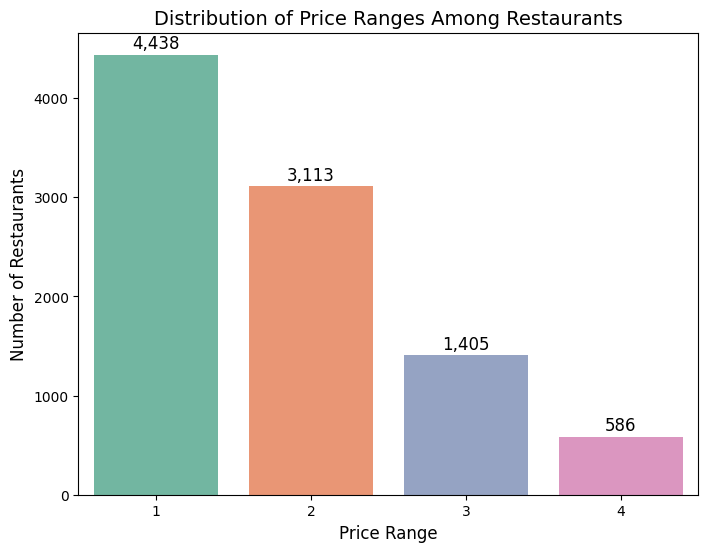

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
price_range_counts = data_cleaned['Price range'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=price_range_counts.index, y=price_range_counts.values, hue=price_range_counts.index, palette='Set2', legend=False)

plt.title('Distribution of Price Ranges Among Restaurants', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 8), textcoords='offset points')

plt.show()


**Q. Calculate the percentage of restaurants in each price range category.**

In [40]:
total_restaurants = len(data_cleaned)
price_range_percentage = (price_range_counts / total_restaurants) * 100

print(price_range_percentage)

Price range
1    46.510166
2    32.624188
3    14.724376
4     6.141270
Name: count, dtype: float64


# Task 4 : Online Delivery

**Q. Determine the percentage of restaurants that offer online delivery.**

In [41]:
restaurants_with_delivery = data_cleaned[data_cleaned['Has Online delivery'] == 'Yes'].shape[0]

total_restaurants = len(data_cleaned)

percentage_delivery = (restaurants_with_delivery / total_restaurants) * 100
print(f"Percentage of restaurants offering online delivery: {percentage_delivery:.2f}%")


Percentage of restaurants offering online delivery: 25.69%


**Q. Compare the average ratings of restaurants with and without online delivery.**

In [42]:
restaurants_with_delivery = data_cleaned[data_cleaned['Has Online delivery'] == 'Yes']
restaurants_without_delivery = data_cleaned[data_cleaned['Has Online delivery'] == 'No']

avg_rating_with_delivery = restaurants_with_delivery['Aggregate rating'].mean()
avg_rating_without_delivery = restaurants_without_delivery['Aggregate rating'].mean()

print(f"Average rating of restaurants with online delivery: {avg_rating_with_delivery:.2f}")
print(f"Average rating of restaurants without online delivery: {avg_rating_without_delivery:.2f}")


Average rating of restaurants with online delivery: 3.25
Average rating of restaurants without online delivery: 2.46
